In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Load data
fpn = pd.read_csv("raw_data.csv")  # Load your data here

# Function to create features
def create_features(df):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df.set_index('date',inplace =True)
    return df

# Function to train Linear Regression model
def train_model(df):
    X = df[FEATURES]
    y = df[TARGET]
    reg = LinearRegression()
    reg.fit(X, y)#, verbose=100)
    return reg

In [2]:
fpn

,date,admin1,admin2,market,latitude,longitude,category,commodity,price
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Maize,175.920000
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Millet,150.180000
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Rice (imported),358.700000
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Sorghum,155.610000
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,pulses and nuts,Beans (niebe),196.870000
...,...,...,...,...,...,...,...,...,...
73685,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Onions,400.000000
73686,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Oranges,500.000000
73687,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Spinach,166.666667
73688,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Tomatoes,400.000000


In [3]:
grouped = fpn.groupby(['date', 'commodity'])
print(grouped)

In [4]:
df = pd.DataFrame(grouped['price'].mean())
df

price
date       commodity                   
2002-01-15 Beans (niebe)     217.970000
           Maize             164.635000
           Millet            148.565000
           Rice (imported)   348.145000
           Sorghum           148.555000
...                                 ...
2023-12-15 Spinach           331.238272
           Sugar            1567.442222
           Tomatoes          300.160000
           Watermelons       203.604938
           Yam               675.198222

[4560 rows x 1 columns]

In [5]:
df = df.sort_values(by=['commodity','date']).reset_index()
df

,date,commodity,price
0,2013-12-15,Bananas,230.769231
1,2014-01-15,Bananas,230.769231
2,2015-01-15,Bananas,269.230769
3,2016-01-15,Bananas,269.230769
4,2016-08-15,Bananas,197.871795
...,...,...,...
4555,2022-06-15,Yam (Abuja),346.213330
4556,2022-07-15,Yam (Abuja),417.420000
4557,2022-11-15,Yam (Abuja),163.915000
4558,2022-12-15,Yam (Abuja),172.811770


In [6]:
# df['date'] = pd.to_datetime(pd.to_datetime(df['date']).apply(lambda x: x.strftime('%Y-%m')))
# df

In [6]:
rice = df[df['commodity'] == 'Rice (imported)']
rice

,date,commodity,price
2952,2002-01-15,Rice (imported),348.145000
2953,2002-02-15,Rice (imported),381.970000
2954,2002-03-15,Rice (imported),353.235000
2955,2002-04-15,Rice (imported),344.430000
2956,2002-05-15,Rice (imported),351.560000
...,...,...,...
3181,2023-08-15,Rice (imported),1075.158500
3182,2023-09-15,Rice (imported),1142.956615
3183,2023-10-15,Rice (imported),1160.833857
3184,2023-11-15,Rice (imported),1212.097857


In [7]:
rice['date'] = pd.to_datetime(rice['date'])
rice.set_index('date', inplace=True)
rice.index = rice.index.to_period('D')

/var/folders/fz/h0vksxt90g7g6hs6xqx9rbdc0000gp/T/ipykernel_42025/4261929225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice['date'] = pd.to_datetime(rice['date'])


In [9]:
rice

,commodity,price
date,,
2002-01-15,Rice (imported),348.145000
2002-02-15,Rice (imported),381.970000
2002-03-15,Rice (imported),353.235000
2002-04-15,Rice (imported),344.430000
2002-05-15,Rice (imported),351.560000
...,...,...
2023-08-15,Rice (imported),1075.158500
2023-09-15,Rice (imported),1142.956615
2023-10-15,Rice (imported),1160.833857


In [10]:
# Time-step feature to determine time-dependence

In [8]:
import numpy as np

rice['time'] = np.arange(len(rice.index))

/var/folders/fz/h0vksxt90g7g6hs6xqx9rbdc0000gp/T/ipykernel_42025/646538317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice['time'] = np.arange(len(rice.index))


In [9]:
rice

,commodity,price,time
date,,,
2002-01-15,Rice (imported),348.145000,0
2002-02-15,Rice (imported),381.970000,1
2002-03-15,Rice (imported),353.235000,2
2002-04-15,Rice (imported),344.430000,3
2002-05-15,Rice (imported),351.560000,4
...,...,...,...
2023-08-15,Rice (imported),1075.158500,229
2023-09-15,Rice (imported),1142.956615,230
2023-10-15,Rice (imported),1160.833857,231


In [13]:
from sklearn.model_selection import train_test_split as tts

In [127]:
X = rice.loc[:, ['time']]
y = rice.loc[:, 'price']

In [15]:
# X_train, X_test, y_train, y_test = tts(X, y, random_state=1)

In [11]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10
)
%config InlineBackend.figure_format='retina'

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

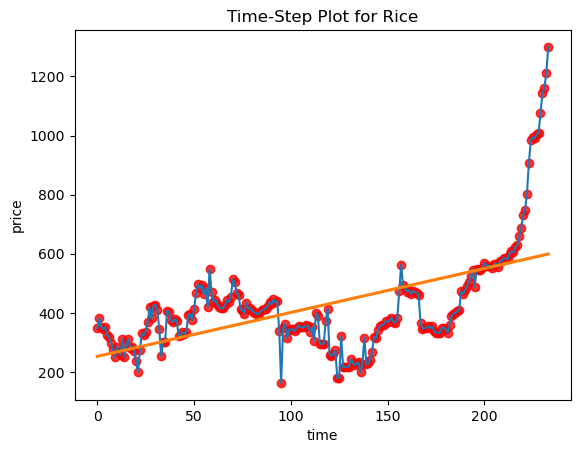

In [12]:
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
ax.plot('time', 'price', data=rice)
ax = sns.regplot(x='time', y='price', data=rice, ci=None, scatter_kws=dict(color='red'))
# ax2 = sns.regplot(x='time', y='price', data=bananas, ci=90, scatter_kws=dict(color='blue'))
ax.set_title('Time-Step Plot for Rice')
plt.show()

In [13]:
model1 = LinearRegression()

In [14]:
model1.fit(X,y)

LinearRegression()

In [15]:
model1.score(X,y)

0.3068862681147785

In [16]:
y_pred = pd.Series(model1.predict(X), index=X.index)

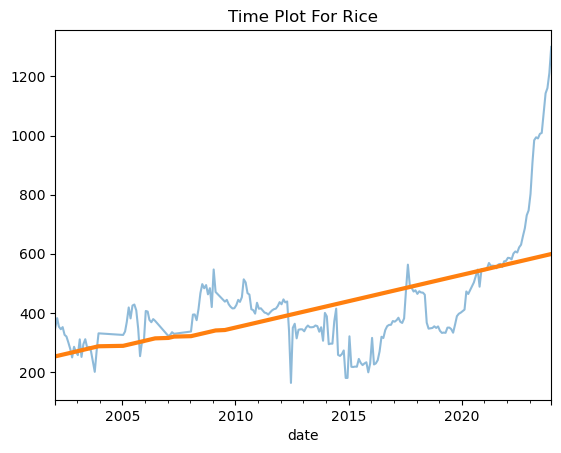

In [17]:
ax = y.plot( y='price', alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot For Rice');

In [138]:
df1

,commodity,price,time
date,,,
2002-01-15,Rice (imported),348.145000,0
2002-02-15,Rice (imported),381.970000,1
2002-03-15,Rice (imported),353.235000,2
2002-04-15,Rice (imported),344.430000,3
2002-05-15,Rice (imported),351.560000,4
...,...,...,...
2023-08-15,Rice (imported),1075.158500,229
2023-09-15,Rice (imported),1142.956615,230
2023-10-15,Rice (imported),1160.833857,231


In [23]:
# trends

C:\Users\Nnamdi\AppData\Local\Temp\ipykernel_49824\440828609.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['commodity'], dtype='object')
  moving_average = rice.rolling(


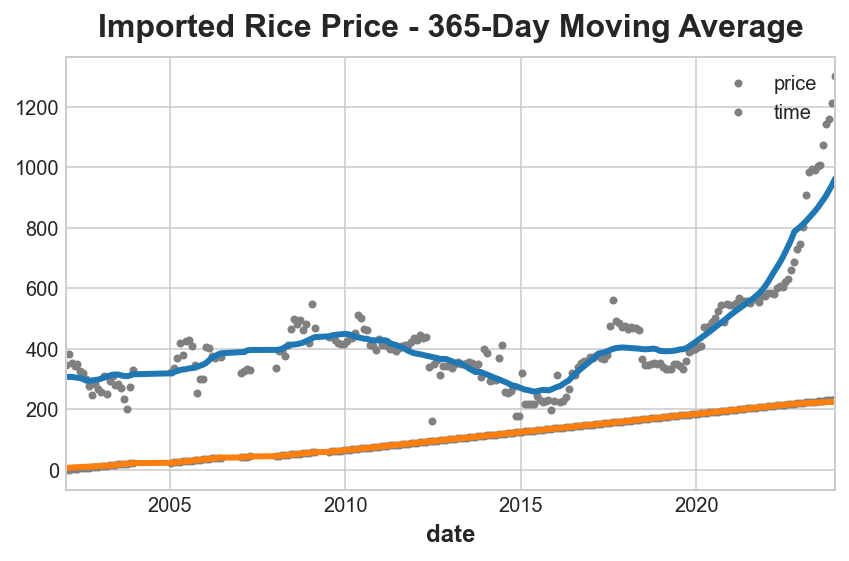

In [24]:
moving_average = rice.rolling(
    window=30,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=15,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = rice.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Imported Rice Price - 365-Day Moving Average", legend=False,
);

In [128]:
from statsmodels.tsa.deterministic import DeterministicProcess

df1 = rice.copy()

dp = DeterministicProcess(
    index=df1.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=3,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend,trend_squared,trend_cubed
date,,,,
2002-01-15,1.0,1.0,1.0,1.0
2002-02-15,1.0,2.0,4.0,8.0
2002-03-15,1.0,3.0,9.0,27.0
2002-04-15,1.0,4.0,16.0,64.0
2002-05-15,1.0,5.0,25.0,125.0


In [100]:
X

,const,trend,trend_squared,trend_cubed
date,,,,
2002-01-15,1.0,1.0,1.0,1.0
2002-02-15,1.0,2.0,4.0,8.0
2002-03-15,1.0,3.0,9.0,27.0
2002-04-15,1.0,4.0,16.0,64.0
2002-05-15,1.0,5.0,25.0,125.0
...,...,...,...,...
2023-08-15,1.0,230.0,52900.0,12167000.0
2023-09-15,1.0,231.0,53361.0,12326391.0
2023-10-15,1.0,232.0,53824.0,12487168.0


In [130]:
X.index = X.index.to_timestamp(freq='M')


In [132]:
from sklearn.linear_model import LinearRegression

y = df1["price"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [131]:
X.index

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', name='date', length=234, freq=None)

In [101]:


# Find the maximum date in the DataFrame
max_date = X.index.max()

# Convert Period object to Timestamp object
timestamp = max_date.to_timestamp()

# Convert Timestamp object to datetime object
max_date_datetime = datetime.fromtimestamp(timestamp.value / 10**9)

# Get the current date
current_date = datetime.now()

# Calculate the difference in days
difference_in_days = (current_date - max_date_datetime).days
difference_in_days

139

In [102]:
num_months = (current_date.year - max_date_datetime.year) * 12 + (current_date.month - max_date_datetime.month)
num_months

5

In [113]:
# Get the last date in the dataset and the prediction date
last_date = X.index.max()
# Convert Period object to Timestamp object
timestamp = last_date.to_timestamp()

# Convert Timestamp object to datetime object
max_date_datetime = datetime.fromtimestamp(timestamp.value / 10**9)
prediction_date = pd.Timestamp('2026-05-02')  # Example prediction date

# Calculate the next monthly date after the last date in the dataset
next_month_date = pd.date_range(start=max_date_datetime + pd.DateOffset(months=1), end=prediction_date, freq='M')

# Generate out-of-sample data for monthly prediction
X = dp.out_of_sample(steps=len(next_month_date))

# Make prediction
y_fore = pd.Series(model.predict(X), index=next_month_date)
y_fore

2024-01-31 01:00:00    1062.782485
2024-02-29 01:00:00    1082.572817
2024-03-31 01:00:00    1102.683520
2024-04-30 01:00:00    1123.116919
2024-05-31 01:00:00    1143.875336
2024-06-30 01:00:00    1164.961098
2024-07-31 01:00:00    1186.376527
2024-08-31 01:00:00    1208.123948
2024-09-30 01:00:00    1230.205686
2024-10-31 01:00:00    1252.624065
2024-11-30 01:00:00    1275.381409
2024-12-31 01:00:00    1298.480043
2025-01-31 01:00:00    1321.922290
2025-02-28 01:00:00    1345.710475
2025-03-31 01:00:00    1369.846923
2025-04-30 01:00:00    1394.333957
2025-05-31 01:00:00    1419.173903
2025-06-30 01:00:00    1444.369084
2025-07-31 01:00:00    1469.921824
2025-08-31 01:00:00    1495.834448
2025-09-30 01:00:00    1522.109281
2025-10-31 01:00:00    1548.748646
2025-11-30 01:00:00    1575.754868
2025-12-31 01:00:00    1603.130271
2026-01-31 01:00:00    1630.877179
2026-02-28 01:00:00    1658.997917
2026-03-31 01:00:00    1687.494810
Freq: M, dtype: float64

In [121]:
# Interpolate the values for days in between the months
all_dates = pd.date_range(start=max_date_datetime + pd.DateOffset(days=1), end=prediction_date)
y_interpolated = y_fore.reindex(all_dates).interpolate(method='linear')
y_interpolated

2024-01-01 01:00:00           NaN
2024-01-02 01:00:00           NaN
2024-01-03 01:00:00           NaN
2024-01-04 01:00:00           NaN
2024-01-05 01:00:00           NaN
                          ...    
2026-04-27 01:00:00    1687.49481
2026-04-28 01:00:00    1687.49481
2026-04-29 01:00:00    1687.49481
2026-04-30 01:00:00    1687.49481
2026-05-01 01:00:00    1687.49481
Freq: D, Length: 852, dtype: float64

In [136]:
X = dp.out_of_sample(steps=30, freq='M')

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore

TypeError: DeterministicProcess.out_of_sample() got an unexpected keyword argument 'freq'

In [114]:
y_fore

2024-01-31 01:00:00    1062.782485
2024-02-29 01:00:00    1082.572817
2024-03-31 01:00:00    1102.683520
2024-04-30 01:00:00    1123.116919
2024-05-31 01:00:00    1143.875336
2024-06-30 01:00:00    1164.961098
2024-07-31 01:00:00    1186.376527
2024-08-31 01:00:00    1208.123948
2024-09-30 01:00:00    1230.205686
2024-10-31 01:00:00    1252.624065
2024-11-30 01:00:00    1275.381409
2024-12-31 01:00:00    1298.480043
2025-01-31 01:00:00    1321.922290
2025-02-28 01:00:00    1345.710475
2025-03-31 01:00:00    1369.846923
2025-04-30 01:00:00    1394.333957
2025-05-31 01:00:00    1419.173903
2025-06-30 01:00:00    1444.369084
2025-07-31 01:00:00    1469.921824
2025-08-31 01:00:00    1495.834448
2025-09-30 01:00:00    1522.109281
2025-10-31 01:00:00    1548.748646
2025-11-30 01:00:00    1575.754868
2025-12-31 01:00:00    1603.130271
2026-01-31 01:00:00    1630.877179
2026-02-28 01:00:00    1658.997917
2026-03-31 01:00:00    1687.494810
Freq: M, dtype: float64

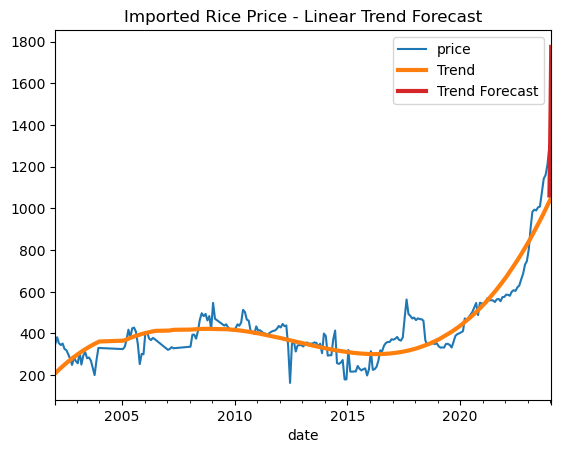

In [135]:
ax = df1.plot(title="Imported Rice Price - Linear Trend Forecast", y='price')
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()
plt.show()

In [139]:
import pandas as pd
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

# Assuming you already have df1 containing your dataset
# Assuming df1 is already in the format:
# df1 = df1.set_index('date')

# Create a deterministic process
dp = DeterministicProcess(
    index=df1.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=3,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

# Create features
X = dp.in_sample()

# Target variable
y = df1["price"]

# Initialize Linear Regression model
model = LinearRegression(fit_intercept=False)

# Fit the model
model.fit(X, y)

# Predict prices
y_pred = pd.Series(model.predict(X), index=X.index)

# Print or return the predictions
print(y_pred)


date
2002-01-15     213.101524
2002-02-15     221.831921
2002-03-15     230.338802
2002-04-15     238.624490
2002-05-15     246.691309
                 ...     
2023-08-15     968.555031
2023-09-15     986.778375
2023-10-15    1005.310468
2023-11-15    1024.153634
2023-12-15    1043.310198
Freq: D, Length: 234, dtype: float64


In [143]:
import pandas as pd
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

# Assuming you already have df1 containing your dataset
# Assuming df1 is already in the format:
# df1 = df1.set_index('date')


# Define the future dates you want to predict
future_dates = pd.date_range(start='2024-01-15', end='2024-12-15', freq='M')

# Extend the index of df1 to include future dates
extended_index = df1.index.union(future_dates)
df1_extended = df1.reindex(extended_index)

# Create a deterministic process
dp = DeterministicProcess(
    index=df1_extended.index,  # dates from the extended dataset
    constant=True,             # dummy feature for the bias (y_intercept)
    order=3,                   # the time dummy (trend)
    drop=True,                 # drop terms if necessary to avoid collinearity
)

# Create features for the extended dataset
X_extended = dp.in_sample()

# Target variable for the training dataset
y = df1["price"]

# Initialize Linear Regression model
model = LinearRegression(fit_intercept=False)

# Fit the model on the training dataset
model.fit(X_extended.loc[df1.index], y)

# Predict prices for the extended dataset (including future dates)
y_pred_extended = pd.Series(model.predict(X_extended), index=X_extended.index)

# Extract the predictions for the future dates
future_predictions = y_pred_extended.loc[future_dates]

# Print or return the predictions for the future dates
print(future_predictions)


2024-01-31 00:00:00    1062.782485
2024-02-29 00:00:00    1082.572817
2024-03-31 00:00:00    1102.683520
2024-04-30 00:00:00    1123.116919
2024-05-31 00:00:00    1143.875336
2024-06-30 00:00:00    1164.961098
2024-07-31 00:00:00    1186.376527
2024-08-31 00:00:00    1208.123948
2024-09-30 00:00:00    1230.205686
2024-10-31 00:00:00    1252.624065
2024-11-30 00:00:00    1275.381409
dtype: float64


In [ ]:
import streamlit as st
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess

# Load data
fpn = pd.read_csv('raw_data.csv')  # Load your data here

# Function to create features
def create_features(df):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    #df['quarter'] = df['date'].dt.quarter
    #df['month'] = df['date'].dt.month
    #df['year'] = df['date'].dt.year
    #df['dayofyear'] = df['date'].dt.dayofyear
    #df['dayofmonth'] = df['date'].dt.day
    #df['weekofyear'] = df['date'].dt.isocalendar().week
    df.set_index('date', inplace=True)
    return df

# Function to train Linear Regression model
def train_model(df):
    X = df[FEATURES]
    y = df[TARGET]
    reg = LinearRegression()
    reg.fit(X, y)
    return reg

# Define Streamlit app
st.title('Commodity Price Prediction App')

# Sidebar inputs
commodity_list = fpn['commodity'].unique().tolist()
selected_commodity = st.sidebar.selectbox('Select Commodity:', commodity_list)
end_month = st.sidebar.selectbox('Select Month:', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
end_year = st.sidebar.text_input('Enter Year:', value=str(fpn['year'].max()))

# Filter data for selected commodity
data = fpn[fpn['commodity'] == selected_commodity][["date", "price"]]
data = data.groupby('date').price.mean().reset_index()

# Create features
data = create_features(data)


TARGET = 'price'

# Train Linear Regression model
model = train_model(data)

# Generate predictions for the selected date
last_train_date = data.index.max()

# Convert last_train_date to datetime if it's not already
if not isinstance(last_train_date, pd.Timestamp):
    last_train_date = pd.to_datetime(last_train_date)

# Generate predictions for the selected date
predict_date = pd.Timestamp(year=int(end_year), month=(end_month+1), day=1) - pd.offsets.MonthEnd(1)
features = create_features(pd.DataFrame({'date': [predict_date]}))
prediction = model.predict(features[FEATURES])[0]

# Display prediction
st.subheader('Prediction:')
st.success(f'The predicted price for {selected_commodity} in {end_month} {end_year} is {prediction:.2f} Naira per KG')

# Plot time series of prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['price'], color='blue', label='Historical Prices')
plt.title('Commodity Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
st.pyplot(plt)


In [144]:
y_pred.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")


<Axes: title={'center': 'Imported Rice Price - Linear Trend Forecast'}, xlabel='date'>

In [29]:
# making the order in the DeterministicProcess function seems to make a better fit for the trend
# but gives an abnormal spike for data out of the training set (forecast) as seen in the zoomed-in
# version below

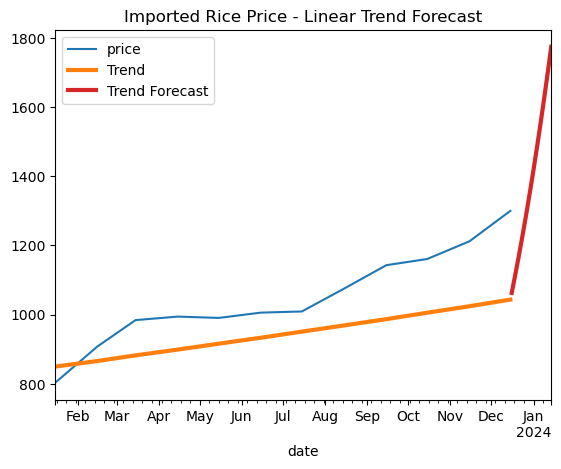

In [38]:
ax = df1["2023-01-15":].plot(title="Imported Rice Price - Linear Trend Forecast", y='price')
ax = y_pred["2023-01-15":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()
plt.show()

In [31]:
# This is unreliable

In [32]:
# Seasonlity

In [33]:
# import numpy as np


# def fourier_features(index, freq, order):
#     time = np.arange(len(index), dtype=np.float32)
#     k = 2 * np.pi * (1 / freq) * time
#     features = {}
#     for i in range(1, order + 1):
#         features.update({
#             f"sin_{freq}_{i}": np.sin(i * k),
#             f"cos_{freq}_{i}": np.cos(i * k),
#         })
#     return pd.DataFrame(features, index=index)


# Compute Fourier features to the 4th order (8 new features) for a
# series y with daily observations and annual seasonality:
#
# fourier_features(y, freq=365.25, order=4)

In [34]:
# plotting the periodogrm

In [41]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

# simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [36]:
df2 = rice['2022-01-15':].copy()

# days within a week
df2["day"] = df2.index.dayofweek  # the x-axis (freq)
df2["week"] = df2.index.week  # the seasonal period (period)

# days within a year
df2["dayofyear"] = X.index.dayofyear
df2["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

ValueError: Length of values (30) does not match length of index (24)

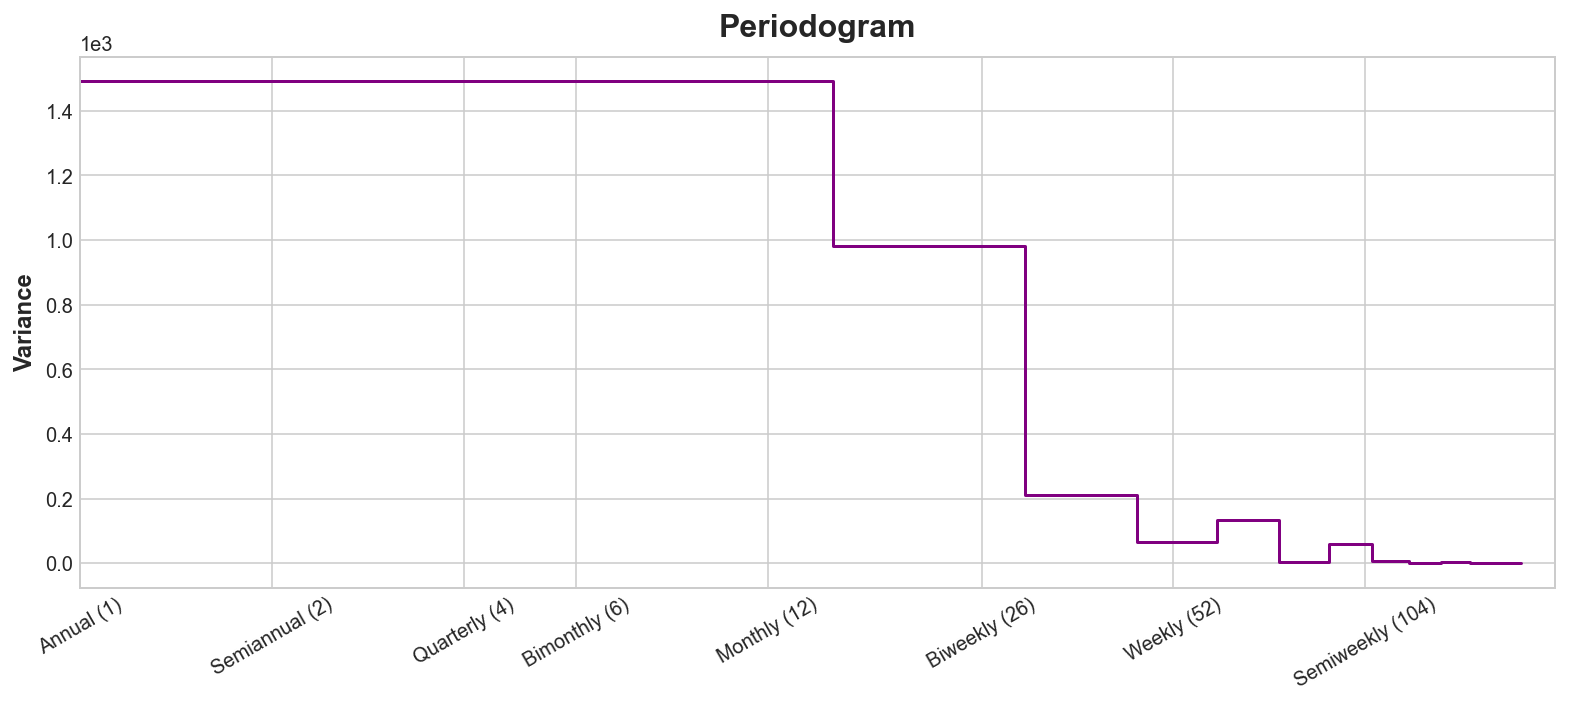

In [37]:
plot_periodogram(df2.price);

In [40]:
df

,date,commodity,price
0,2013-12-15,Bananas,230.769231
1,2014-01-15,Bananas,230.769231
2,2015-01-15,Bananas,269.230769
3,2016-01-15,Bananas,269.230769
4,2016-08-15,Bananas,197.871795
...,...,...,...
4555,2022-06-15,Yam (Abuja),346.213330
4556,2022-07-15,Yam (Abuja),417.420000
4557,2022-11-15,Yam (Abuja),163.915000
4558,2022-12-15,Yam (Abuja),172.811770


In [39]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=4)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=df2.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

NameError: name 'df2' is not defined

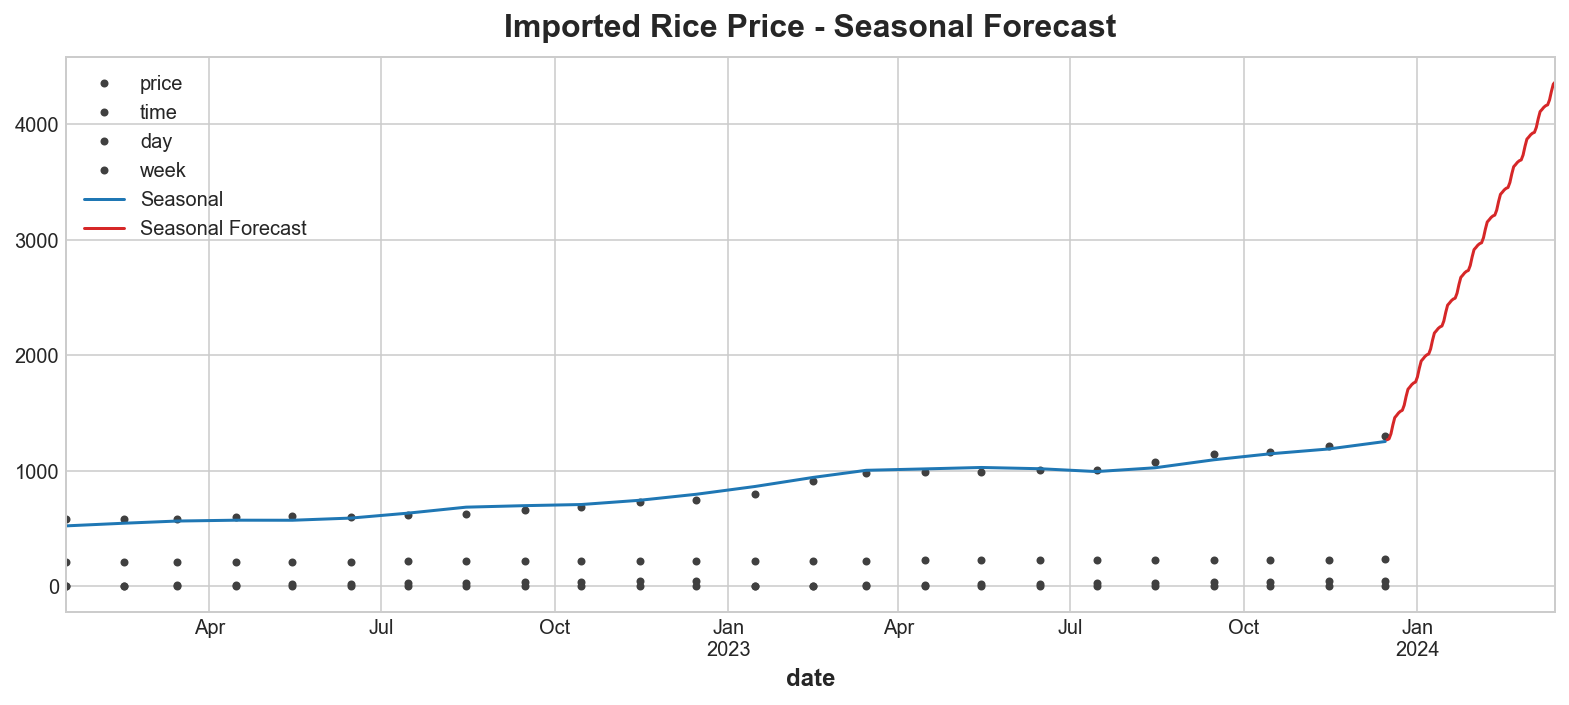

In [45]:
y2 = df2["price"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y2)

y_pred = pd.Series(model.predict(X), index=y2.index, name='Fitted')
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = df2.plot(color='0.25', style='.', title="Imported Rice Price - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

In [46]:
df1

,commodity,price,time
date,,,
2002-01-15,Rice (imported),348.145000,0
2002-02-15,Rice (imported),381.970000,1
2002-03-15,Rice (imported),353.235000,2
2002-04-15,Rice (imported),344.430000,3
2002-05-15,Rice (imported),351.560000,4
...,...,...,...
2023-08-15,Rice (imported),1075.158500,229
2023-09-15,Rice (imported),1142.956615,230
2023-10-15,Rice (imported),1160.833857,231


In [67]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=3)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=df1.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

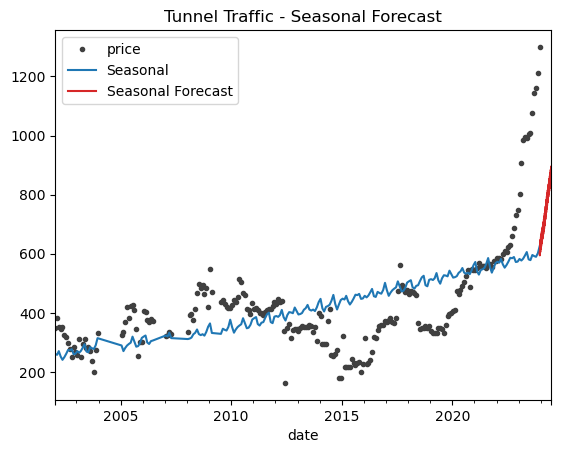

In [68]:
y = df1["price"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=190)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()